<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/Banknote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/banknotes.csv')

In [ ]:
df.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [ ]:
df.shape

(200, 7)

In [ ]:
df['conterfeit'].value_counts()

0    100
1    100
Name: conterfeit, dtype: int64

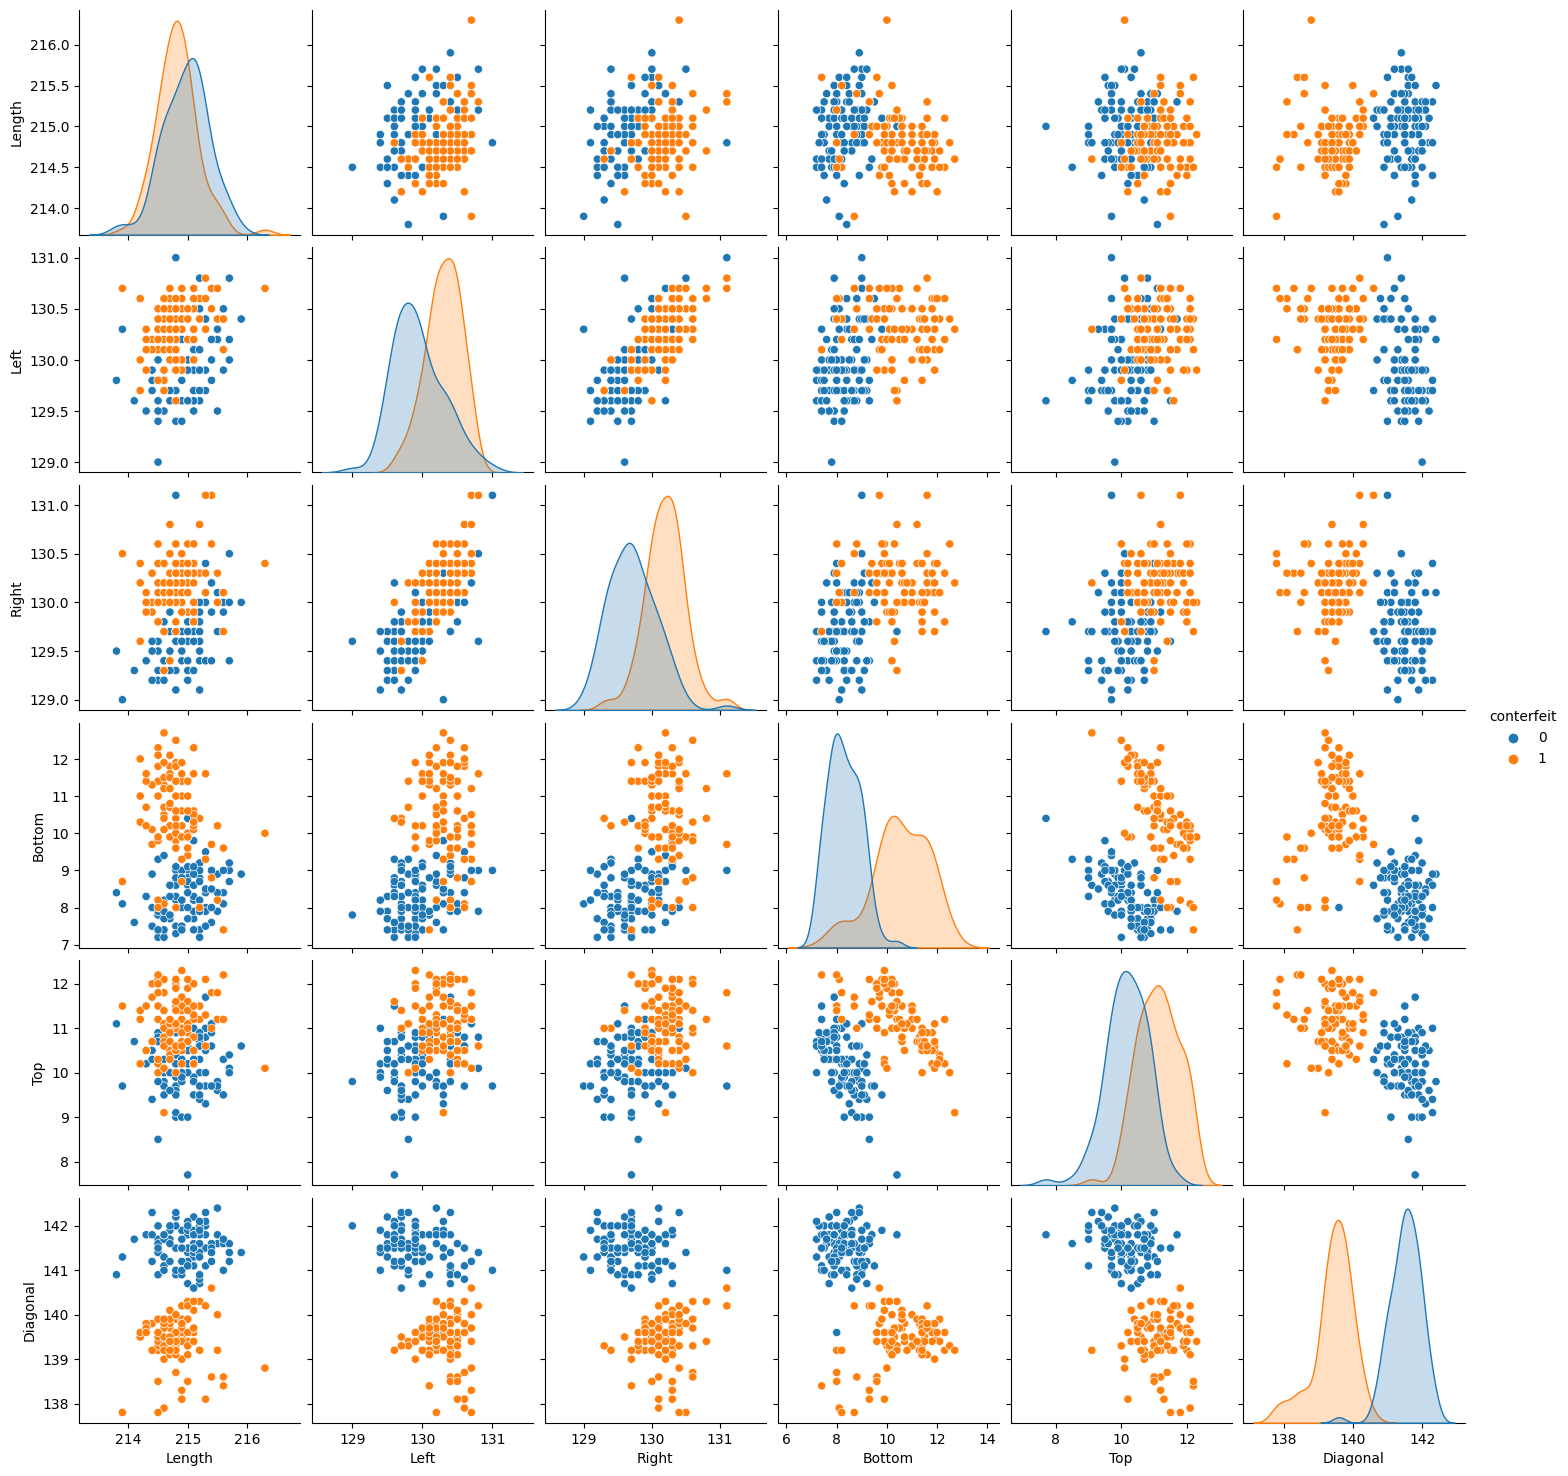

In [ ]:
sns.pairplot(df,hue='conterfeit')

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


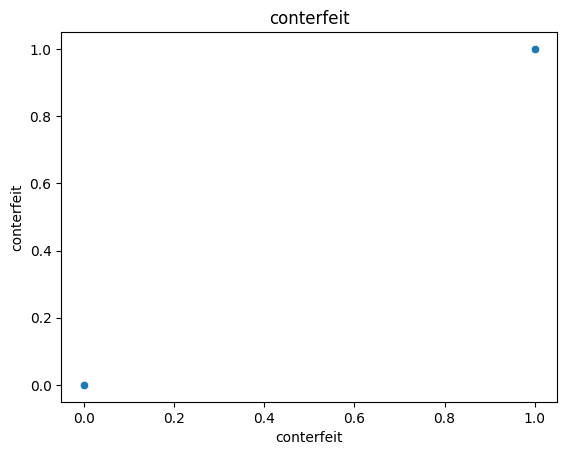

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


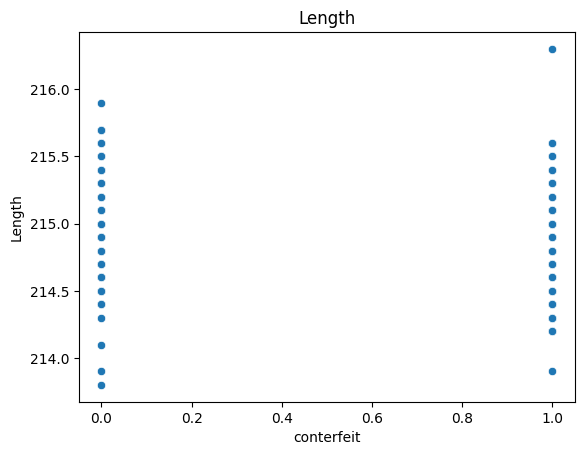

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


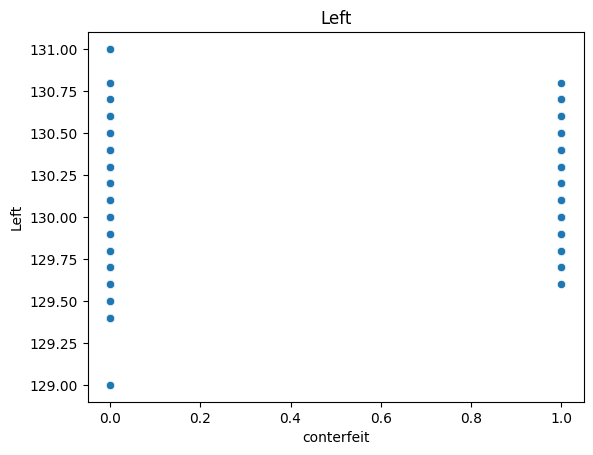

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


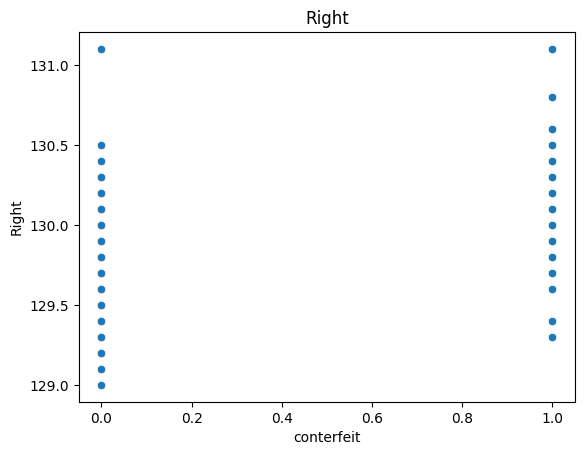

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


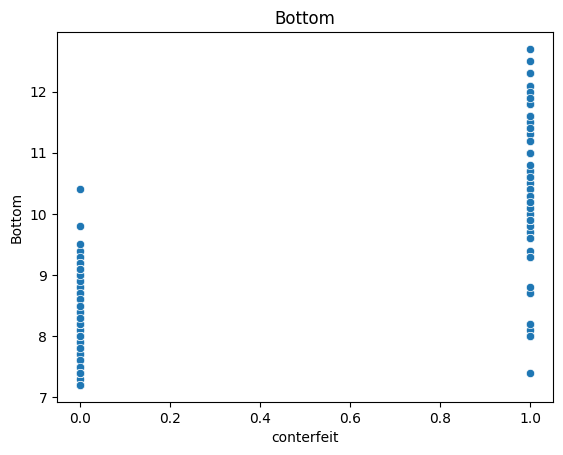

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


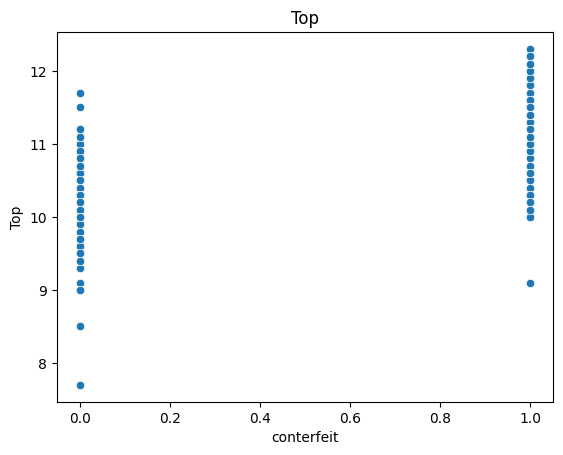

<ipython-input-7-656060390fbd>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')


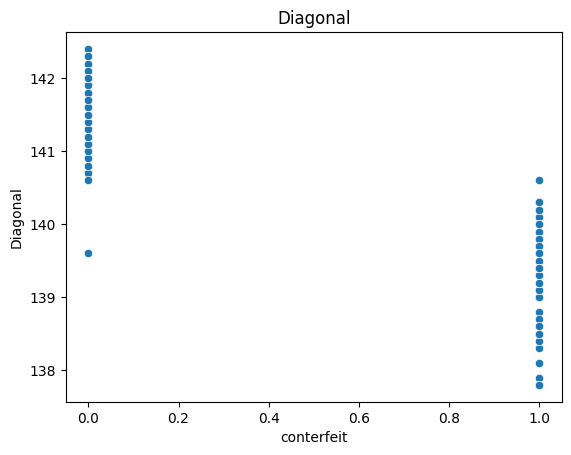

In [ ]:
for column in df.columns:
    sns.scatterplot(data=df,y=column,x='conterfeit', palette='his')
    plt.title(column)
    plt.show()

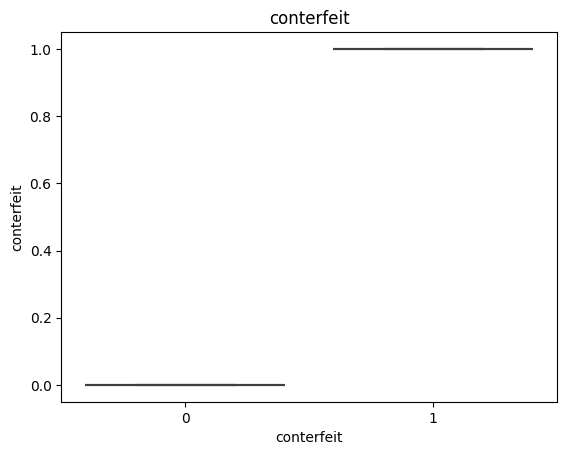

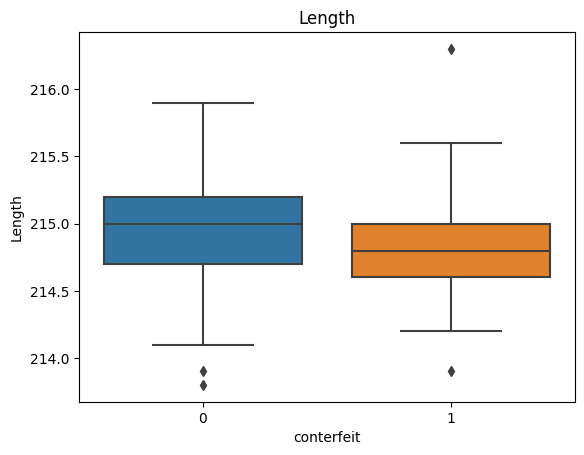

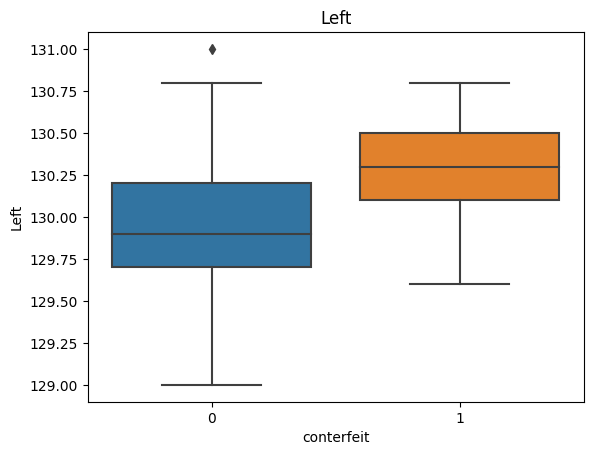

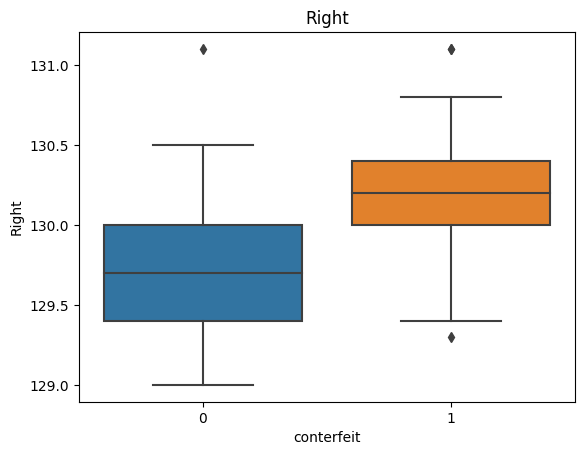

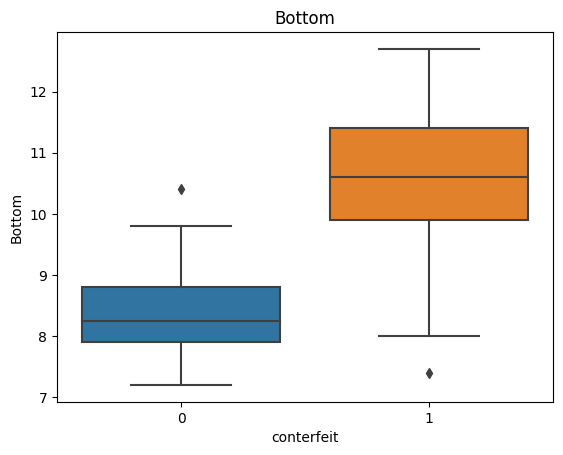

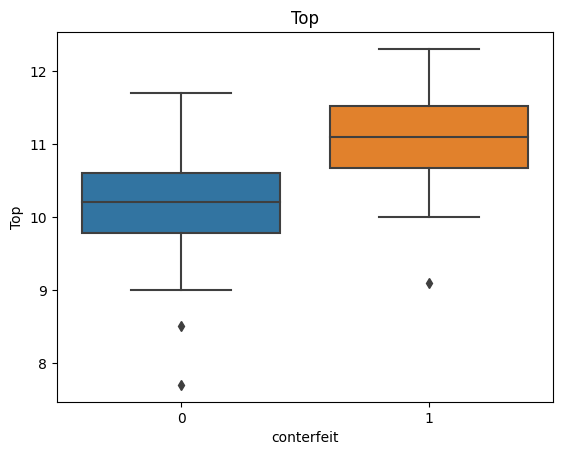

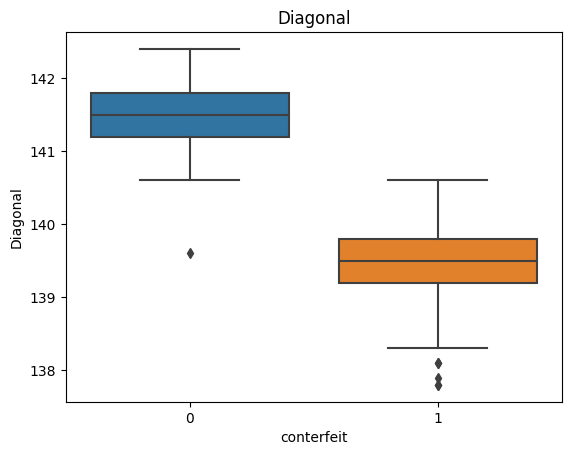

In [ ]:
for column in df.columns:
    sns.boxplot(data=df,y=column,x='conterfeit')
    plt.title(column)
    plt.show()

In [ ]:
df.isnull().sum()

conterfeit    0
Length        0
Left          0
Right         0
Bottom        0
Top           0
Diagonal      0
dtype: int64

In [ ]:
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


<Axes: >

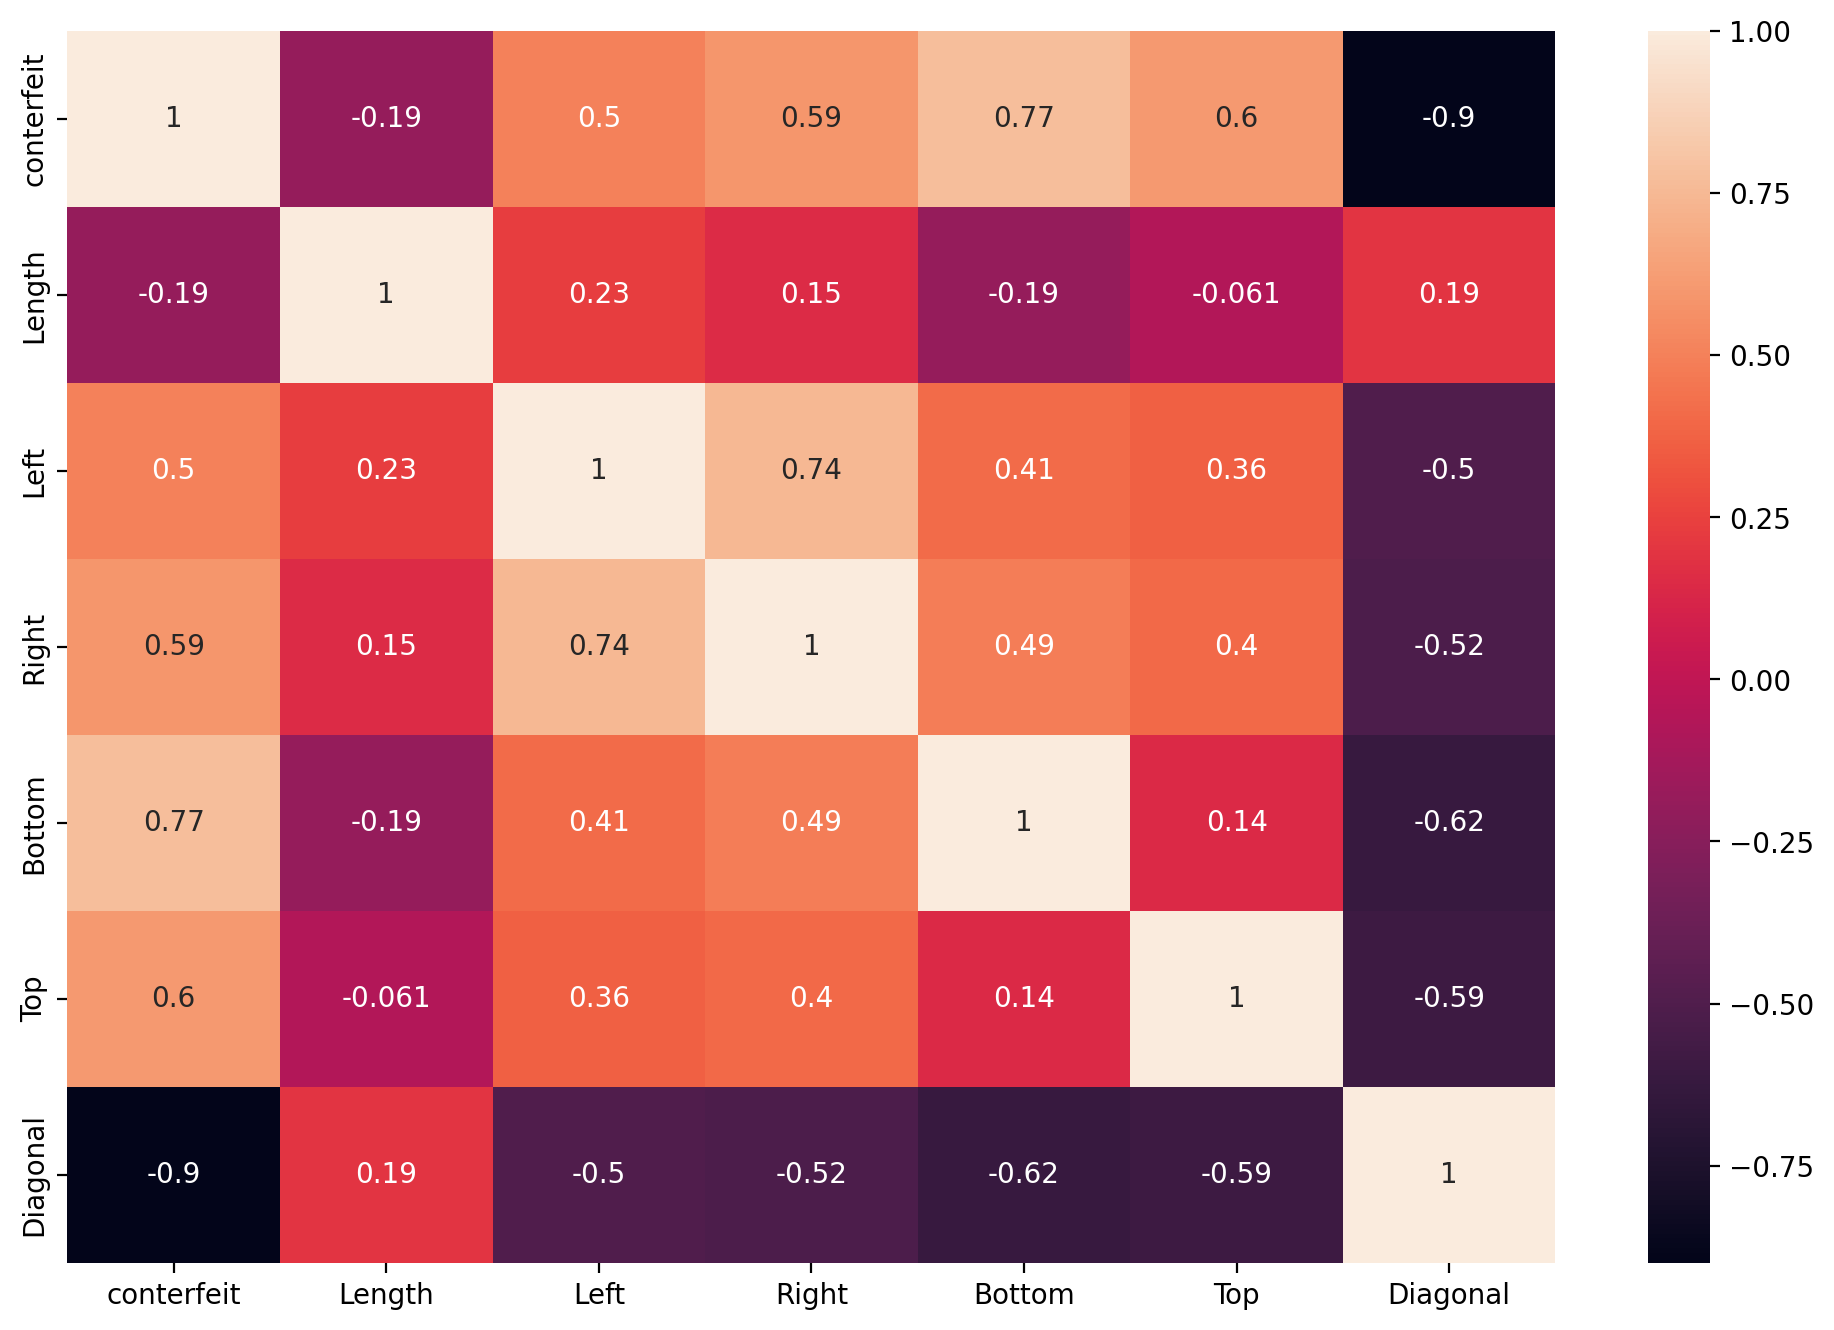

In [ ]:

plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.columns

Index(['conterfeit', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal'], dtype='object')

In [ ]:
column=['conterfeit', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']

q1=df[column].quantile (0.25)
q2=df[column].quantile (0.75)
IQR=q2-q1

#filter_outliers
df1=df[~((df[column]<(q1-1.5*IQR))|(df[column]>(q2+1.5*IQR))).any(axis=1)]

print('orginal shape of df',df.shape)
print('orginal shape of df1',df1.shape)

orginal shape of df (200, 7)
orginal shape of df1 (192, 7)


In [ ]:
df1['conterfeit'].value_counts()

1    97
0    95
Name: conterfeit, dtype: int64

In [ ]:
x=df1.drop('conterfeit', axis=1)
y=df1['conterfeit']

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=101)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
y_train.value_counts()

1    70
0    64
Name: conterfeit, dtype: int64

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [ ]:
! pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_balanced, x_test, y_balanced,y_test)

100%|██████████| 29/29 [00:02<00:00, 12.61it/s]

[LightGBM] [Info] Number of positive: 70, number of negative: 70
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.42
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.04
XGBClassifier,1.00,1.00,1.00,1.00,0.08
SVC,1.00,1.00,1.00,1.00,0.03
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.03
RidgeClassifier,1.00,1.00,1.00,1.00,0.03
RandomForestClassifier,1.00,1.00,1.00,1.00,0.30
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.02
NuSVC,1.00,1.00,1.00,1.00,0.02


In [ ]:
import pickle

In [ ]:
file=open('models.pkl','wb')
pickle.dump(models,file)

In [ ]:
!pip install datasist
import datasist as ds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00
